<a href="https://colab.research.google.com/github/StephenJohnson-CardiffUni/Astro/blob/main/Exoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

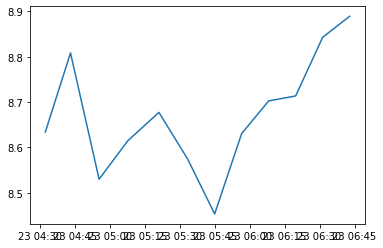

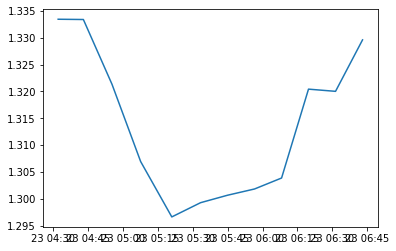

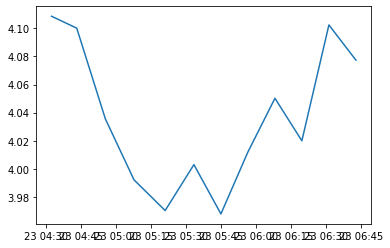

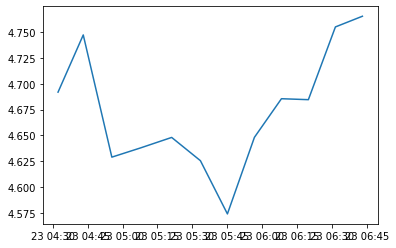

In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

timeStamps = [datetime.datetime(2011,8,23,4,32,20),
              datetime.datetime(2011,8,23,4,43,9),
              datetime.datetime(2011,8,23,4,55,25),
              datetime.datetime(2011,8,23,5,7,43),
              datetime.datetime(2011,8,23,5,21,5),
              datetime.datetime(2011,8,23,5,33,25),
              datetime.datetime(2011,8,23,5,45),
              datetime.datetime(2011,8,23,5,56,35),
              datetime.datetime(2011,8,23,6,8,11),
              datetime.datetime(2011,8,23,6,19,44),
              datetime.datetime(2011,8,23,6,31,20),
              datetime.datetime(2011,8,23,6,42,55)]

target = np.array([174720,172740,173570,173050,171930,170930,168850,169600,171170,173040,174280,175240])
cali1 = np.array([20237,19611,20348,20088,19814,19935,19974,19651,19669,19859,19709,19714])
cali2 = np.array([131030,129550,131360,132410,132600,131560,129820,130280,131280,131050,132030,131800])
cali3 = np.array([42526,42131,43010,43347,43303,42700,42553,42273,42262,43045,42483,42979])

normed1 = target/cali1
normed2 = target/cali2
normed3 = target/cali3

plt.plot(timeStamps,normed1)
plt.figure()
plt.plot(timeStamps,normed2)
plt.figure()
plt.plot(timeStamps,normed3)


'''Crazy mean taking madness'''
meanResult = np.zeros(len(timeStamps))
for i in range(len(timeStamps)):
  meanResult[i] = np.mean([normed1[i],normed2[i],normed3[i]])

plt.figure()
plt.plot(timeStamps,meanResult)


In [1]:
'''Combined keplers 3rd and transit time eq, looking for a

Kep     | P = (2pi*a^3/2)/(GM)^1/2
transit | a = (P*Rstar)/T*pi

'''
import scipy.constants as con
T     = 6551                  #s
Rstar = (0.823)*(6.96*10**8)  #m
Mstar = (0.85) *(2*10**30)    #kg

#a = ((T/Rstar)**2)*(4/(con.G*Mstar))
a = ((T*((con.G*Mstar)**0.5))/(2*Rstar))**(2/5)

print(a)

82.01217704892645
